In [1]:
!pip install descartes
!pip install geopandas
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 120.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 134.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.5 MB/s eta 0:00:00


In [2]:
from osgeo import gdal
from osgeo import ogr# 矢量处理数据包(shp,json等)
from osgeo import osr# 投影坐标包
from osgeo import gdal_array
from osgeo import gdalconst
import geopandas as gpd
import numpy as np

import json# json是存储和交换文本信息的语法，类似 XML
import requests# 网络数据获取(开源数据，不开源就用爬虫)
import matplotlib.pyplot as plt
%matplotlib inline

(840, 12)
   FNODE_  TNODE_  LPOLY_  RPOLY_  LENGTH  HYD1_4M_  HYD1_4M_ID  GBCODE  \
0      18      18       6       4   0.075         1        1359   23010   
1      19      19       5       4   0.111         2        1359   23010   
2      21      21       7       4   0.104         3        1359   23010   
3      29      32      10      13   0.418         4         355   21011   
4      31      33      11      12   0.084         5         346   21011   

                 NAME  LEVEL_RIVE  LEVEL_LAKE  \
0            ¿ËÂ³Â×ºÓ           3           1   
1            ¿ËÂ³Â×ºÓ           3           1   
2            ¿ËÂ³Â×ºÓ           3           1   
3  ÎÚ¼ÓºÓ(ÎÚÖé¶û¹ùÀÕ)           4           0   
4                »ÆºÓ           1           0   

                                            geometry  
0  LINESTRING (117.75391 49.16444, 117.75777 49.1...  
1  LINESTRING (117.71732 49.18985, 117.72263 49.1...  
2  LINESTRING (117.00603 48.79309, 117.00961 48.7...  
3  LINESTRING (107.79887

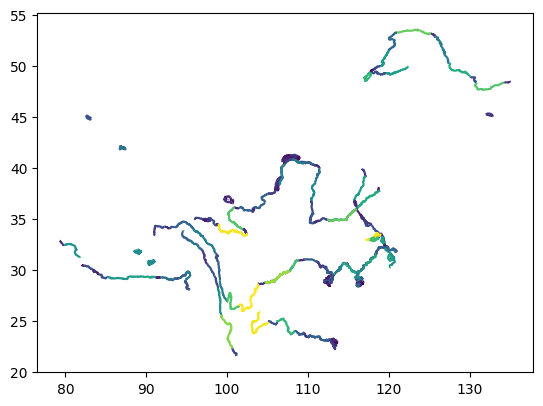

In [ ]:
# gdf = gpd.read_file('/content/drive/MyDrive/AI data/GIS/linedata/JPN_wat/JPN_water_lines_dcw.shp')
gdf = gpd.read_file('/content/drive/MyDrive/AI data/GIS/linedata/CHN1thRiver/hyd1_4l.shp')
print(gdf.shape)
print(gdf.head())

gdf.plot(column='LENGTH') #column后面的参数是属性，可在head中查看
plt.show()

**use geopandas to convert projection or coordinates system**

In [ ]:
# convert from one crs to another
gdf_new = gdf.to_crs(epsg=3857)
print("gdf.crs:",gdf.crs)
print("gdf_new:",gdf_new.crs)

print(gdf_new.shape)
print(gdf_new.head())

gdf_new.plot(column='LENGTH') #column后面的参数是属性，可在head中查看
plt.show()

**使用Geopandas和contextily显示地图和shapfile**

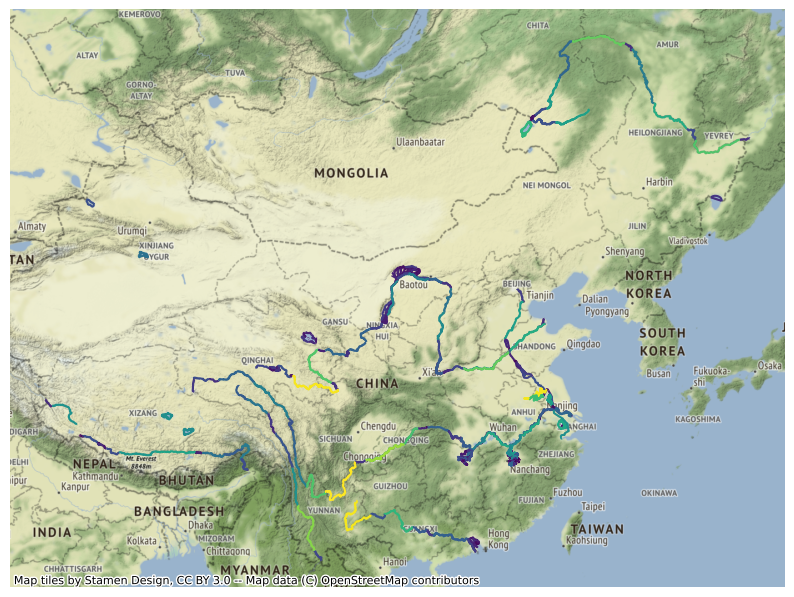

In [ ]:
import contextily as ctx
gdf = gpd.read_file('/content/drive/MyDrive/AI data/GIS/linedata/CHN1thRiver/hyd1_4l.shp')
# convert from one crs to another
gdf_3857 = gdf.to_crs(epsg=3857)

ax = gdf_3857.plot(figsize=(10,10),column='LENGTH')

# add basemap
# ctx.add_basemap(ax)
# 可以在"https://github.com/geopandas/contextily"中查看可修改得底图
# 此处没成功可能是因为也有国内得在线地图资源
ctx.add_basemap(ax,url=ctx.providers.OpenTopoMap)


# 关掉X轴和Y轴。
ax.set_axis_off()

plt.show()